In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from ase.build import bulk

# Build a bulk structure of MgO with rocksalt crystal structure
# Then, replace some of the Mg atoms with Fe atoms at a specified ratio.
conv_cell = bulk("MgO", crystalstructure="rocksalt", a=4.2, cubic=True)
rng = np.random.default_rng(123)
replace_element = "Mg"
new_elements=("Mg", "Fe")
supercell_size = 4
supercell_diag = (supercell_size, supercell_size, supercell_size)
T_low = 100
T_high = 1000
ratios = list(np.linspace(0.1, 0.9, 33, endpoint=True))
snapshot_counts = 50
window=(40, 40)
debug_mode = False
num_bins = 200

In [ ]:
import tc.sampler_data
import tc.wang_landau
import os

temperatures = np.linspace(100, 1500, 10000)
Cv_mat = np.empty((len(ratios), len(temperatures)))
data_list = [tc.sampler_data.load_sampler_data(os.path.join('samplers', str(supercell_size), f"sampler_{round(1000 * ratio)}.npz")) for ratio in ratios]
for i, data in enumerate(data_list):
    Cv_mat[i, :] = tc.wang_landau.compute_thermodynamics(data, temperatures)
    Tc, dTc = tc.wang_landau.Tc_from_Cv(temperatures, Cv_mat[i, :])
    print(f"Ratio {ratios[i]:.2f}: Tc = {Tc:.2f} K, dTc = {dTc:.2f} K")
fig = tc.wang_landau.plot_cv_surface(ratios, temperatures, Cv_mat, mode="scatter", engine="plotly")
fig.show()

Ratio 0.10: Tc = 149.97 K, dTc = 0.00 K
Ratio 0.12: Tc = 142.96 K, dTc = -0.00 K


ValueError: Cv does not cross half-maximum.

In [ ]:
import tc.sampler_data
import tc.wang_landau
import os

data_list = [tc.sampler_data.load_sampler_data(os.path.join('samplers', str(supercell_size), f"sampler_{round(1000 * ratio)}.npz")) for ratio in ratios]
dos_mat = tc.wang_landau.compute_dos_matrix(data_list)
for ratio, sample in zip(ratios, data_list):
    print(f"[ratio {ratio:.3f}]  final mod-factor = {sample.mod_factor_trace[-1]:.3e}")
fig = tc.wang_landau.plot_dos_surface(ratios, dos_mat, mode="scatter", engine="plotly")
fig.show()
hist_mat  = tc.wang_landau.compute_histogram_matrix(data_list)   # prints final mod-factors
fig = tc.wang_landau.plot_hist_heatmap(ratios, hist_mat, engine="plotly")
fig.show()

[ratio 0.100]  final mod-factor = 4.768e-07
[ratio 0.125]  final mod-factor = 7.629e-06
[ratio 0.150]  final mod-factor = 9.537e-07
[ratio 0.175]  final mod-factor = 4.883e-04
[ratio 0.200]  final mod-factor = 9.537e-07
[ratio 0.225]  final mod-factor = 9.766e-04
[ratio 0.250]  final mod-factor = 9.537e-07
[ratio 0.275]  final mod-factor = 9.537e-07
[ratio 0.300]  final mod-factor = 9.537e-07
[ratio 0.325]  final mod-factor = 9.537e-07
[ratio 0.350]  final mod-factor = 2.384e-07
[ratio 0.375]  final mod-factor = 9.537e-07
[ratio 0.400]  final mod-factor = 3.052e-05
[ratio 0.425]  final mod-factor = 9.537e-07
[ratio 0.450]  final mod-factor = 9.537e-07
[ratio 0.475]  final mod-factor = 4.768e-07
[ratio 0.500]  final mod-factor = 4.768e-07
[ratio 0.525]  final mod-factor = 9.537e-07
[ratio 0.550]  final mod-factor = 9.537e-07
[ratio 0.575]  final mod-factor = 9.537e-07
[ratio 0.600]  final mod-factor = 9.537e-07
[ratio 0.625]  final mod-factor = 9.537e-07
[ratio 0.650]  final mod-factor 

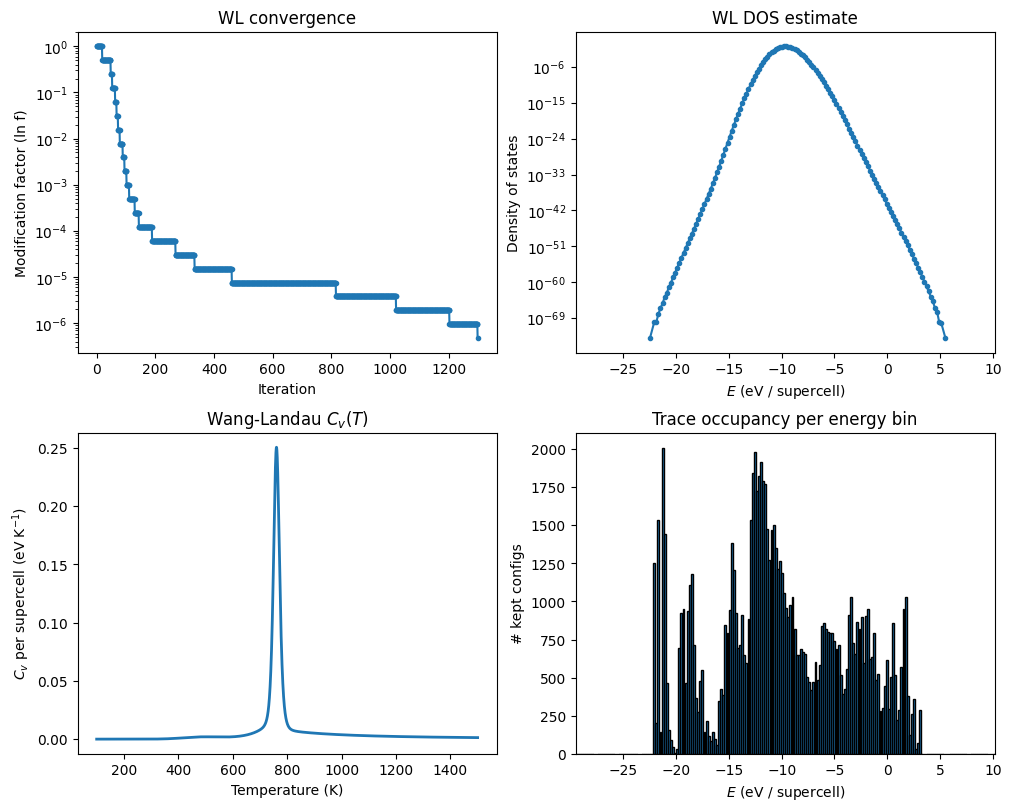

In [ ]:
temperatures = np.linspace(100, 1500, 10000)
data = tc.sampler_data.load_sampler_data(os.path.join('samplers', str(supercell_size), "sampler_500.npz"))
tc.wang_landau.generate_wl_plots(data, temperatures)